In [2]:
import pandas as pd
import folium

# Read the CSV file into a DataFrame
df = pd.read_csv("train_real.csv")

# Drop rows with missing values
# df = df.dropna(subset=['LAT', 'LONG'])

# # Create a map centered around the coordinates
# map_center = [df['LAT'].mean(), df['LONG'].mean()]
# m = folium.Map(location=map_center, zoom_start=10)

# # Add markers for each latitude and longitude
# for index, row in df.iterrows():
#     lat = row['LAT']
#     lon = row['LONG']
#     folium.Marker([lat, lon]).add_to(m)

# # Display the map
# m


In [12]:
def convert_unix_timestamps(df):
    # Convert the timestamp column to datetime
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')

    # Extract day of the year
    df['Day_of_Year'] = df['TIMESTAMP'].dt.dayofyear

    # Extract day of the week (Monday is 0 and Sunday is 6)
    df['Day_of_Week'] = df['TIMESTAMP'].dt.dayofweek

    # Extract hour of the day
    df['Hour_of_Day'] = df['TIMESTAMP'].dt.hour

    # Extract minute of the hour
    df['Minute_of_Hour'] = df['TIMESTAMP'].dt.minute

    # Extract month of the year
    df['Month_of_Year'] = df['TIMESTAMP'].dt.month

    # Calculate the week of the year
    df['Week_of_Year'] = df['TIMESTAMP'].dt.isocalendar().week

    # Calculate the 15-minute segment of the day
    df['Segment_of_Day'] = (df['TIMESTAMP'].dt.minute // 15) + 1

    return df


In [18]:
import pandas as pd

# Read the CSV file

# Find the maximum value for the "TIME" column
max_time = df['TIME'].max()

print("Maximum value for TIME:", max_time * 15)

df['TIME'] = df['TIME'] * 15



Maximum value for TIME: 58215


In [13]:
print(df.columns.values)
import matplotlib.pyplot as plt


df = convert_unix_timestamps(df)

print(df.columns.values)



['TRIP_ID' 'CALL_TYPE' 'ORIGIN_CALL' 'ORIGIN_STAND' 'TAXI_ID' 'TIMESTAMP'
 'DAY_TYPE' 'MISSING_DATA' 'TIME' 'LONG' 'LAT' 'Day_of_Year' 'Day_of_Week'
 'Hour_of_Day' 'Minute_of_Hour' 'Week_of_Year' 'Segment_of_Day']
['TRIP_ID' 'CALL_TYPE' 'ORIGIN_CALL' 'ORIGIN_STAND' 'TAXI_ID' 'TIMESTAMP'
 'DAY_TYPE' 'MISSING_DATA' 'TIME' 'LONG' 'LAT' 'Day_of_Year' 'Day_of_Week'
 'Hour_of_Day' 'Minute_of_Hour' 'Week_of_Year' 'Segment_of_Day'
 'Month_of_Year']


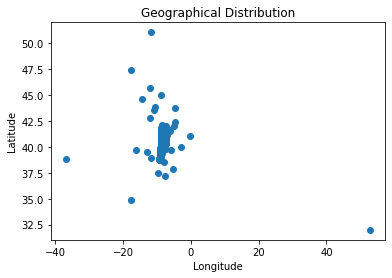

In [10]:
# Create a scatter plot of latitude and longitude
plt.scatter(df['LONG'], df['LAT'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()


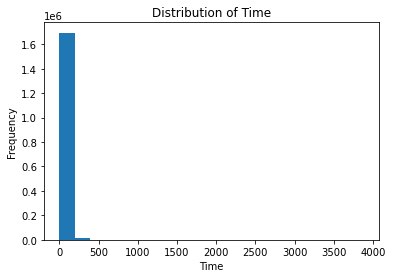

In [11]:
# Create a histogram for the 'TIME' variable
plt.hist(df['TIME'], bins=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.show()


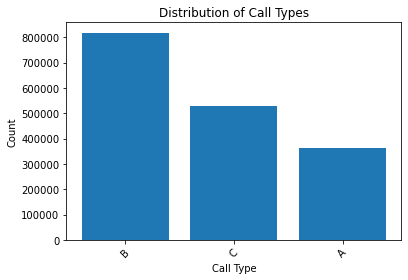

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'CALL_TYPE' column
call_type_counts = df['CALL_TYPE'].value_counts()

# Create a bar chart
plt.bar(call_type_counts.index, call_type_counts.values)
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Distribution of Call Types')
plt.xticks(rotation=45)
plt.show()


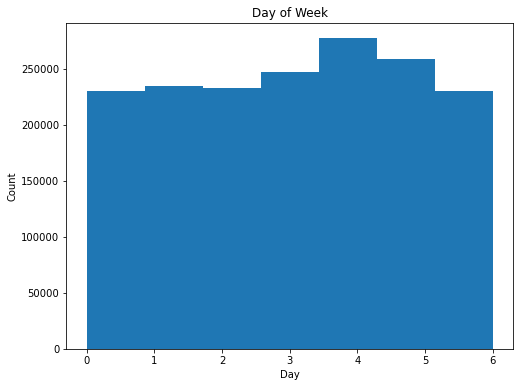

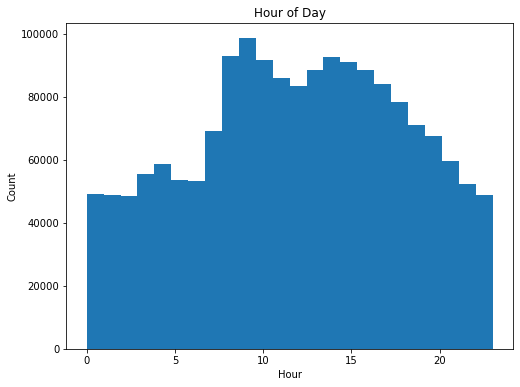

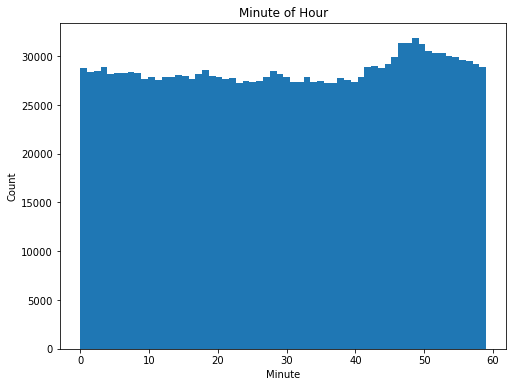

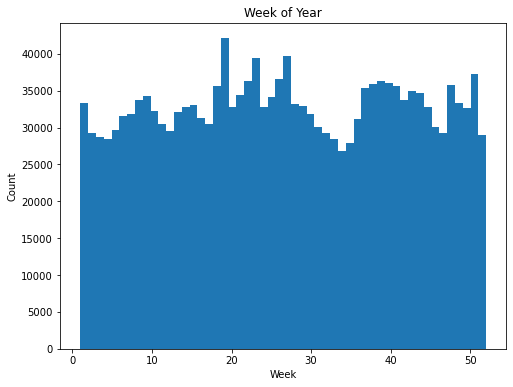

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called 'df'
# Extract the columns for plotting
day_of_week = df['Day_of_Week']
hour_of_day = df['Hour_of_Day']
minute_of_hour = df['Minute_of_Hour']
week_of_year = df['Week_of_Year']

# Plot Day_of_Week
plt.figure(figsize=(8, 6))
plt.hist(day_of_week, bins=7)
plt.title('Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# Plot Hour_of_Day
plt.figure(figsize=(8, 6))
plt.hist(hour_of_day, bins=24)
plt.title('Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Plot Minute_of_Hour
plt.figure(figsize=(8, 6))
plt.hist(minute_of_hour, bins=60)
plt.title('Minute of Hour')
plt.xlabel('Minute')
plt.ylabel('Count')
plt.show()

# Plot Week_of_Year
plt.figure(figsize=(8, 6))
plt.hist(week_of_year, bins=52)
plt.title('Week of Year')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()


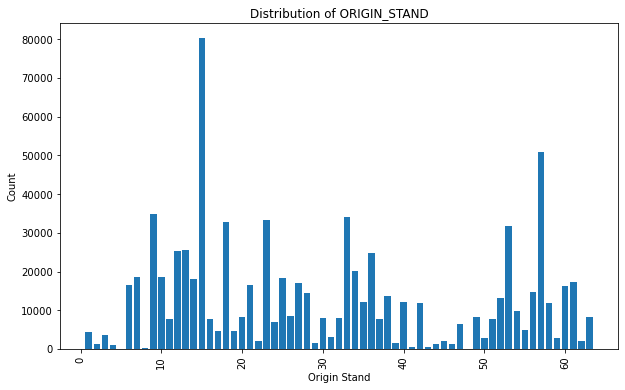

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called 'df'
# Extract the column for plotting
origin_stand = df['ORIGIN_STAND']

# Count the occurrences of each value
value_counts = origin_stand.value_counts()

# Sort the values by index
sorted_counts = value_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.title('Distribution of ORIGIN_STAND')
plt.xlabel('Origin Stand')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


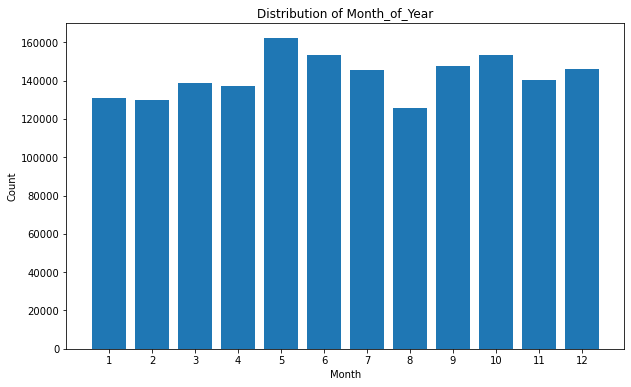

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called 'df'
# Extract the column for plotting
month_of_year = df['Month_of_Year']

# Count the occurrences of each month
value_counts = month_of_year.value_counts()

# Sort the values by index
sorted_counts = value_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.title('Distribution of Month_of_Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))
plt.show()


/tmp/ipykernel_146/2568855312.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


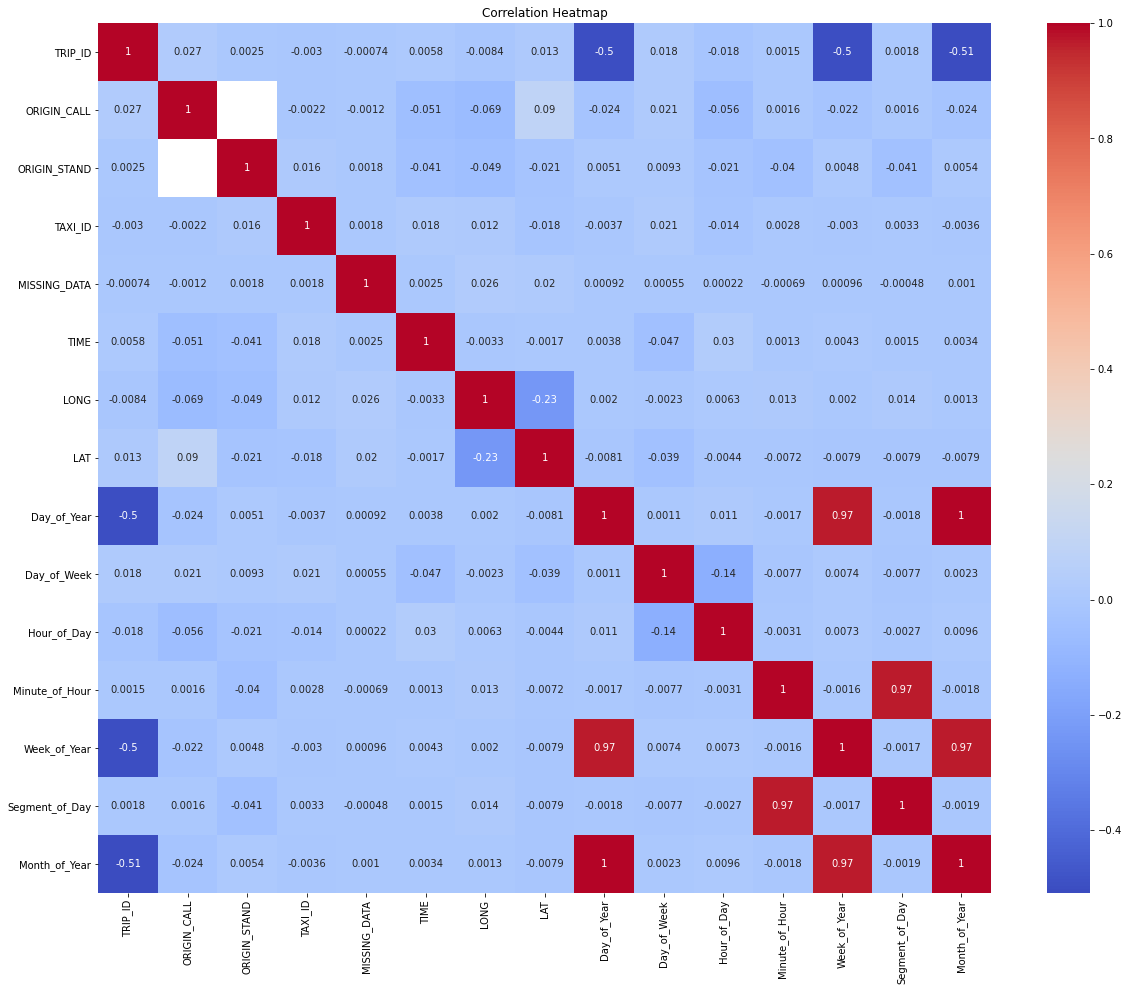

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


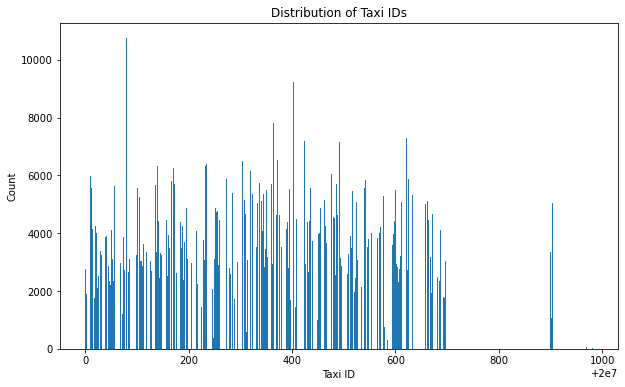

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called 'df'
# Extract the column for plotting
taxi_id = df['TAXI_ID']

# Count the occurrences of each taxi ID
value_counts = taxi_id.value_counts()

# Sort the values by index
sorted_counts = value_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.title('Distribution of Taxi IDs')
plt.xlabel('Taxi ID')
plt.ylabel('Count')
plt.show()


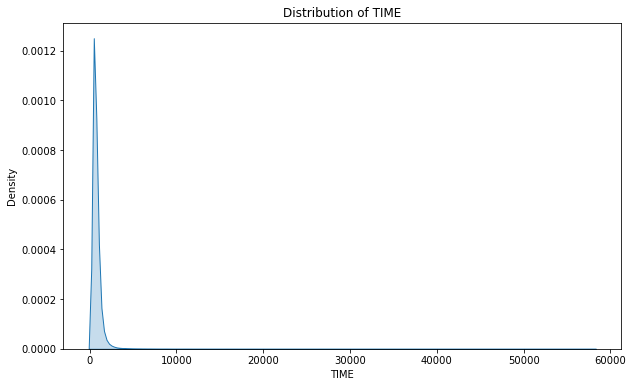

In [20]:
time = df['TIME']

# Plot the kernel density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(time, shade=True)
plt.title('Distribution of TIME')
plt.xlabel('TIME')
plt.ylabel('Density')
plt.show()

In [21]:
time = df['TIME']

# Calculate the percentage of values beyond 4000
percentage_beyond_4000 = (time[time > 4000].count() / len(time)) * 100

print(f"Percentage of values beyond 4000: {percentage_beyond_4000:.2f}%")

Percentage of values beyond 4000: 0.48%


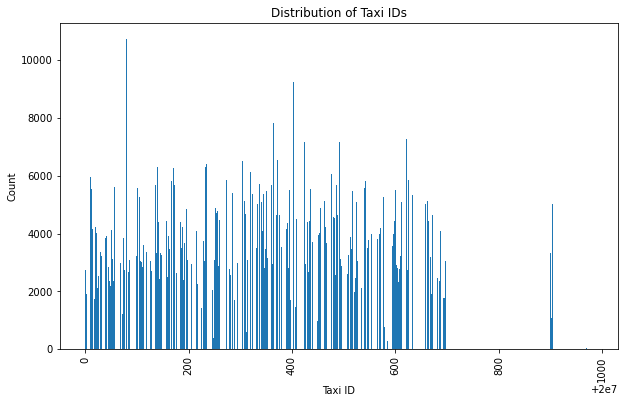

In [22]:
taxi_id = df['TAXI_ID']

# Count the occurrences of each taxi ID
value_counts = taxi_id.value_counts()

# Sort the values by index
sorted_counts = value_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.title('Distribution of Taxi IDs')
plt.xlabel('Taxi ID')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


In [28]:
test = pd.read_csv("test_public.csv")
print(test.columns.values)
test = convert_unix_timestamps(test)
print(test.columns.values)

['TRIP_ID' 'CALL_TYPE' 'ORIGIN_CALL' 'ORIGIN_STAND' 'TAXI_ID' 'TIMESTAMP'
 'DAY_TYPE' 'MISSING_DATA']
['TRIP_ID' 'CALL_TYPE' 'ORIGIN_CALL' 'ORIGIN_STAND' 'TAXI_ID' 'TIMESTAMP'
 'DAY_TYPE' 'MISSING_DATA' 'Day_of_Year' 'Day_of_Week' 'Hour_of_Day'
 'Minute_of_Hour' 'Month_of_Year' 'Week_of_Year' 'Segment_of_Day']


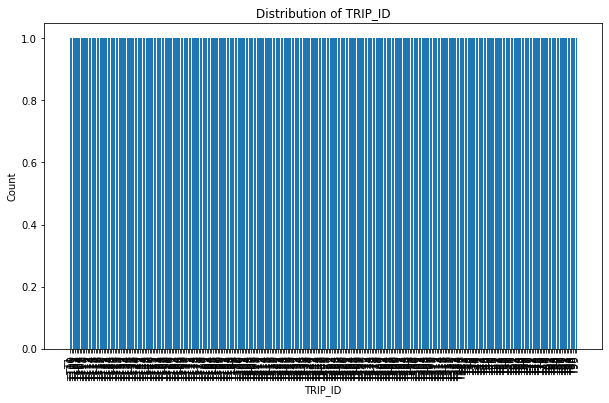

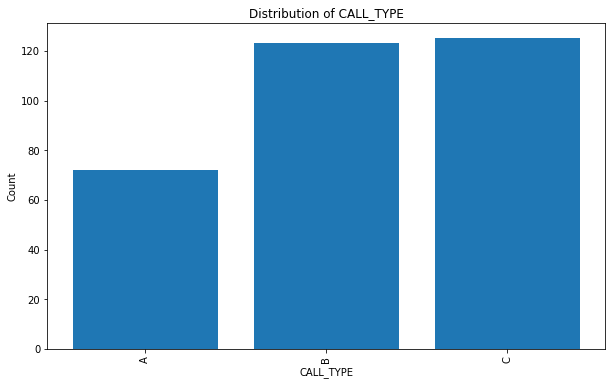

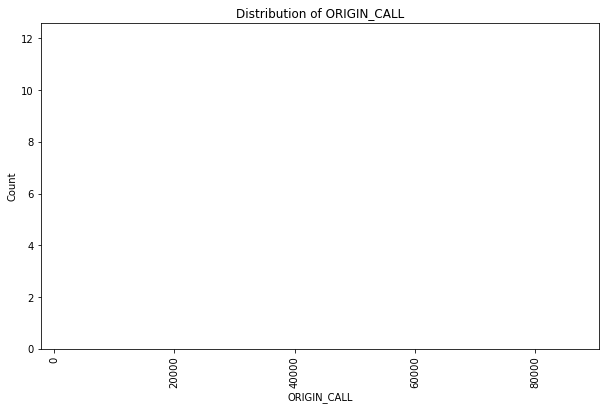

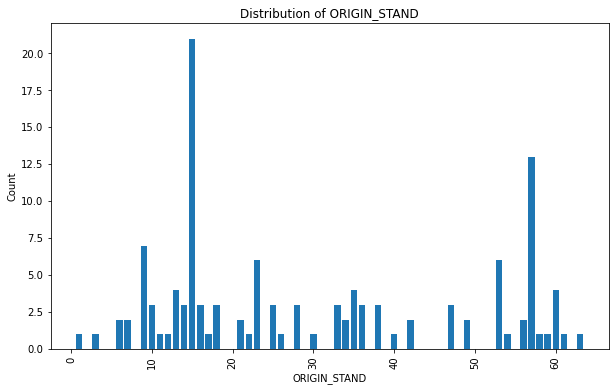

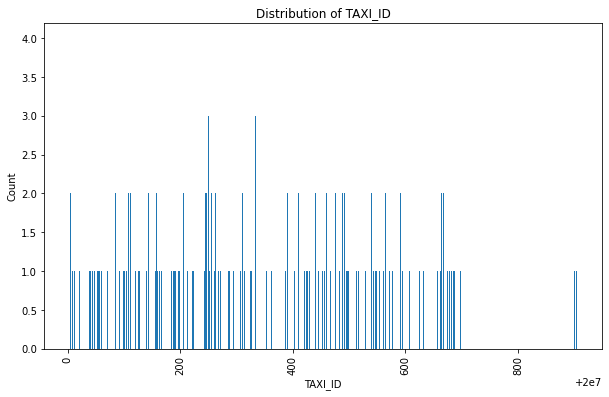

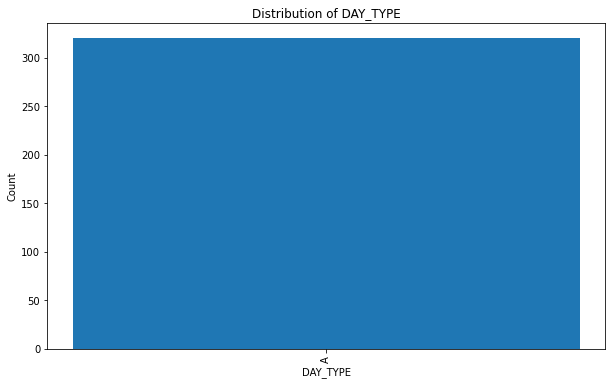

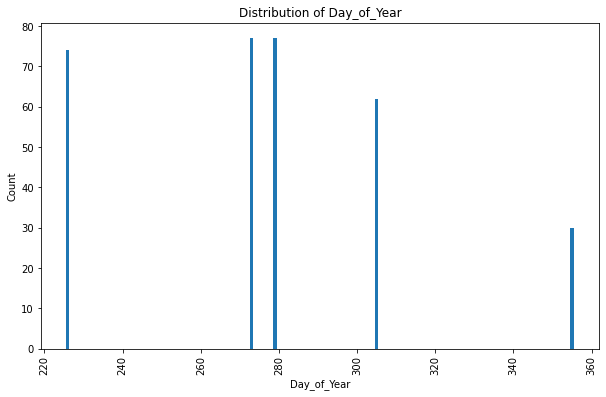

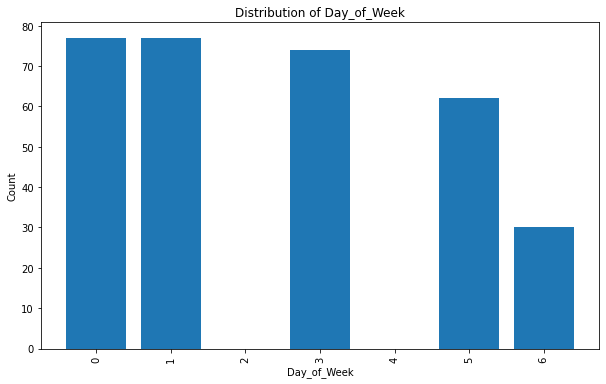

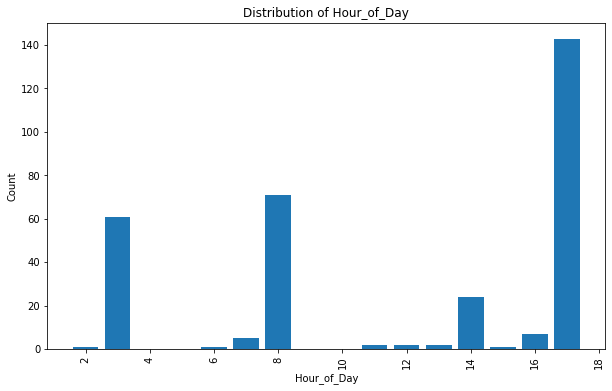

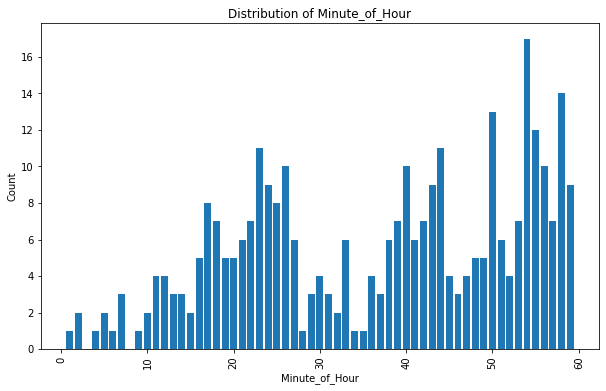

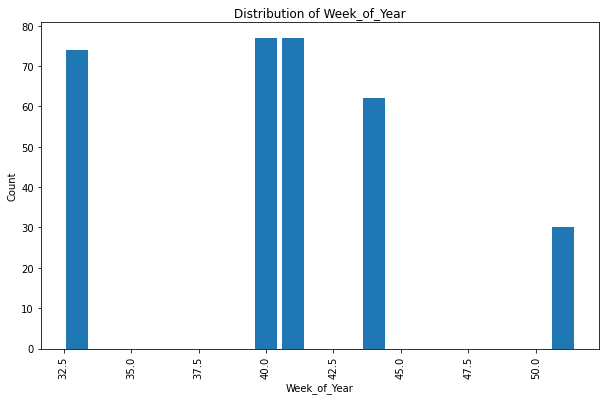

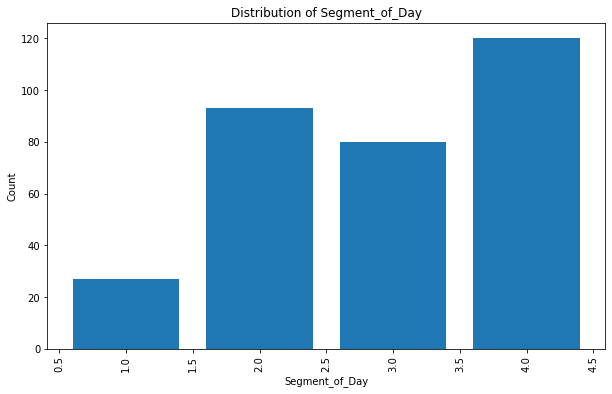

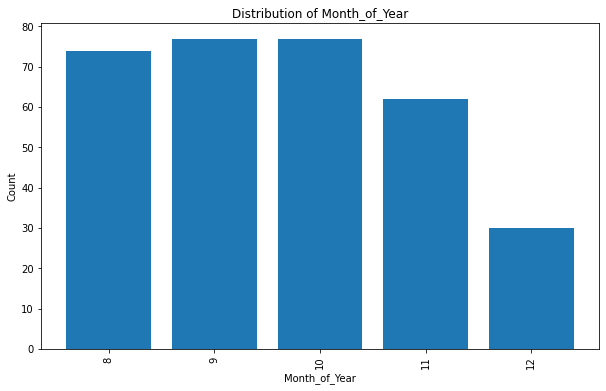

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called 'train'
columns_to_plot = ['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'DAY_TYPE', 'Day_of_Year', 'Day_of_Week', 'Hour_of_Day', 'Minute_of_Hour',
                   'Week_of_Year', 'Segment_of_Day', 'Month_of_Year']

for column in columns_to_plot:
    if column not in ['MISSING_DATA', 'TIMESTAMP', 'LONG', 'LAT']:
        plt.figure(figsize=(10, 6))
        if column == 'TIME':
            plt.hist(test[column], bins=50)
        else:
            value_counts = test[column].value_counts()
            sorted_counts = value_counts.sort_index()
            plt.bar(sorted_counts.index, sorted_counts.values)
            plt.xticks(rotation='vertical')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.savefig(f'test_{column}_distribution.png')  # Save the figure with the modified file name

        plt.show()

